### 一、小波变换的共空间模式的运动想象（四类）识别：

（1）导入mne包，提取dbf数据

（2）提取wpd特征和csp特征

（3）进行分类

（4）结果可视化处理

In [1]:
import mne
from matplotlib.pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Mention the file path to the dataset
filename = "D:/EEG_dataset/BCI_IV_2a_gdf/A01T.gdf"
raw = mne.io.read_raw_edf(filename)
print(raw.info)
print(raw.ch_names)

Extracting EDF parameters from D:\EEG_dataset\BCI_IV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, ...
    chs : list | 25 items (EEG: 25)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.5 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 100.0 Hz
    meas_date : tuple | 2005-01-17 12:00:00 GMT
    nchan : int | 25
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info

<ipython-input-1-baf0d64205ae>:8: DeprecationWarning: The use of read_raw_edf for GDF files is deprecated. Please use read_raw_gdf instead.
  raw = mne.io.read_raw_edf(filename)
E:\Anaconda\lib\site-packages\mne\io\edf\edf.py:1049: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-1-baf0d64205ae>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filename)


## Events and Epoch Extraction

In [2]:
edf_events = mne.io.find_edf_events(raw)
# events = (np.vstack((edf_events[][],edf_events[][],edf_events[][]))).T
events=edf_events[0]
raw.load_data()
raw.filter(7.,35., fir_design='firwin')
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,exclude='bads')
tmin, tmax = 1., 4.
# event_id = dict(left_hand =769,right_hand = 770,foot = 771,tongue = 772)
event_id=dict(left_hand =7,right_hand = 8,foot = 9,tongue = 10)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,baseline=None, preload=True)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


E:\Anaconda\lib\site-packages\mne\utils\docs.py:824: DeprecationWarning: Function find_edf_events is deprecated; find_edf_events is deprecated in 0.18, and will be removed in 0.19. Please use `mne.events_from_annotations` instead
  warnings.warn(msg, category=DeprecationWarning)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 sec)

288 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 288 events and 751 original time points ...
0 bad epochs dropped


### Epoch Average

<Evoked  |  'left_hand' (average, N=72), [1, 4] sec, 22 ch, ~176 kB>


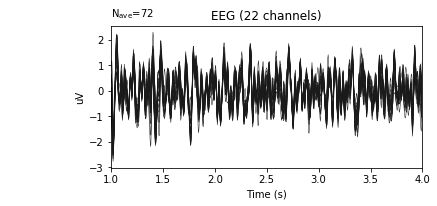

<Evoked  |  'right_hand' (average, N=72), [1, 4] sec, 22 ch, ~176 kB>


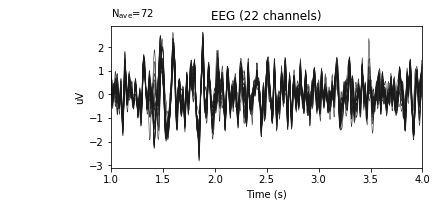

<Evoked  |  'foot' (average, N=72), [1, 4] sec, 22 ch, ~176 kB>


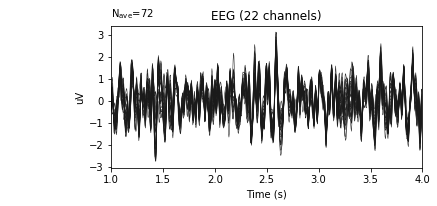

<Evoked  |  'tongue' (average, N=72), [1, 4] sec, 22 ch, ~176 kB>


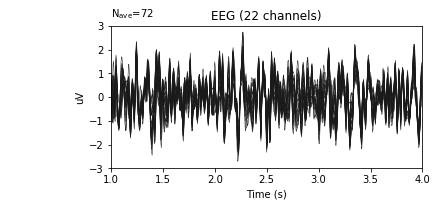

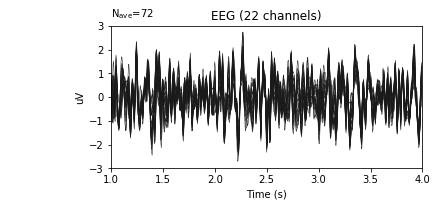

In [34]:
#Left hand epoch average plot
evoked = epochs['left_hand'].average()
print(evoked)
evoked.plot(time_unit='s')
# Right hand epoch average plot
evoked = epochs['right_hand'].average()
print(evoked)
evoked.plot(time_unit='s')
# Foot epoch average plot
evoked = epochs['foot'].average()
print(evoked)
evoked.plot(time_unit='s')
# Tongue epoch average plot
evoked = epochs['tongue'].average()
print(evoked)
evoked.plot(time_unit='s')

事件相关电位

## 数据和标签

In [3]:
# labels = epochs.events[:,-1] - 769 + 1
labels=epochs.events[:,-1]-7
data = epochs.get_data()
print('data',data.shape)
print('labels',labels.shape)

data (288, 22, 751)
labels (288,)


Text(0, 0.5, '幅值(v)')

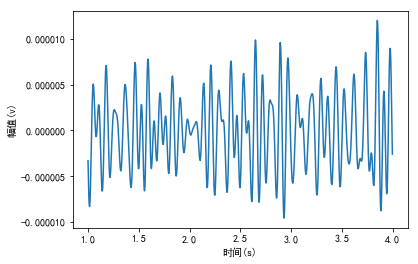

In [60]:
test=data[0][14][:750]
x_test=np.arange(1,4,0.004)
plot(x_test,test,)
plt.xlabel("时间(s)")
plt.ylabel("幅值(v)")

In [36]:
test2=data[0].T
test3=data[0]
print(test2.shape)
print(test3.shape)

(751, 22)
(22, 751)


# 小波分解重构数据8-20Hz

Maximum reconstruction error: 5.861307815482793e-07


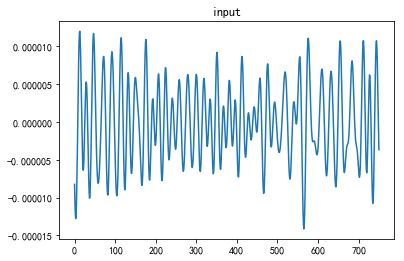

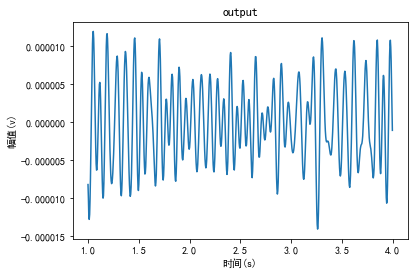

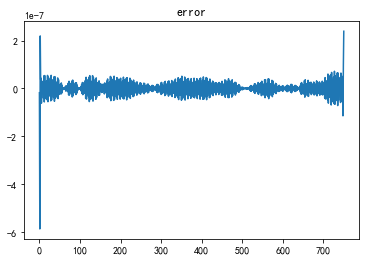

In [59]:
import pywt
wp = pywt.WaveletPacket(data=test3[0], wavelet='sym4', mode='symmetric', maxlevel=4)
new_wp = pywt.WaveletPacket(data=None, wavelet='sym4', mode='symmetric')
new_wp['a'] = wp['a']
# new_wp['d'] = wp['d']

# new_wp['da']=wp['da']
# new_wp['dd']=wp['dd']
# new_wp['aa'] = wp['aa']
# new_wp['ad'] = wp['ad']

# new_wp['aaa']=wp['aaa']
# new_wp['aaad']=wp['aaad']
# new_wp['aad']=wp['aad']
# new_wp['ada']=wp['ada']
# new_wp['ddd']=wp['ddd']

# new_wp['aaaa']=wp['aaaa']
# new_wp['aaad']=wp['aaad'].data

# new_wp['aada']=wp['aada'].data
# new_wp['aadd']=wp['aadd']

# new_wp['adaa']=wp['adaa']
# new_wp['adad']=wp['adad']

# new_wp['adda']=wp['adda']
# new_wp['addd']=wp['addd']

# new_wp['ddaa']=wp['ddaa']
# new_wp['ddad']=wp['ddad']

# new_wp['ddda']=wp['ddda']
# new_wp['dddd']=wp['dddd']



vecx=new_wp.reconstruct(update=True)

figure()
plot(test3[0])
title("input")

figure()
plot(np.arange(1,4,0.004),vecx[0:750])
plt.xlabel("时间(s)")
plt.ylabel("幅值(v)")
title("output")

figure()
plot(test3[0]-vecx[0:751])
title("error")

print('Maximum reconstruction error: {0}'.format(np.max(np.abs(test3[0]-vecx[0:751]))))

Text(0, 0.5, '幅值(V)')

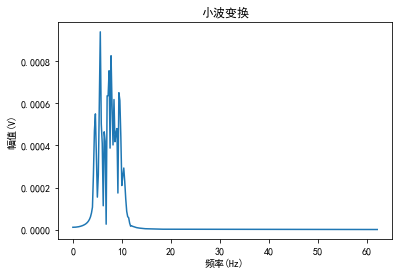

In [54]:
import scipy
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq

mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False  

t3_fft=fft(vecx[0:751])
abs_t3_fft=np.abs(t3_fft)

x=np.arange(1251)
#数据长度
N=1251
#采样频率
fs=250
freq=x*fs/N
half_freq = freq[range(int(N/4))] 
half_t3=abs_t3_fft[range(int(N/4))] 

plt.figure()
plt.plot(half_freq,half_t3)
# plt.plot(x,abs_t3_fft)   
title('小波变换')
plt.xlabel("频率(Hz)")
plt.ylabel("幅值(V)")

Text(0, 0.5, '幅值(V)')

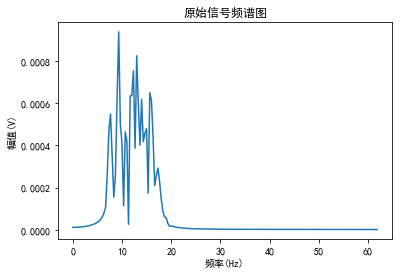

In [49]:
test3_fft=fft(test3[0])
abs_test3_fft=np.abs(test3_fft)

x=np.arange(751)
#数据长度
N=751
#采样频率
fs=250
freq=x*fs/N
half_test3_freq = freq[range(int(N/4))] 
half_test3=abs_test3_fft[range(int(N/4))] 



plt.figure()
plt.plot(half_test3_freq,half_test3)
# plt.plot(x,abs_t3_fft)   
title('原始信号频谱图')
plt.xlabel("频率(Hz)")
plt.ylabel("幅值(V)")



# 双树复小波分解重构8-20Hz数据

In [38]:
import dtcwt

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [42]:
transform = dtcwt.Transform1d()
vecs_x=transform.forward(X=test2[0:750,0],nlevels=5)
vecs_recon = transform.inverse(vecs_x)

Maximum reconstruction error: 5.082197683525802e-21


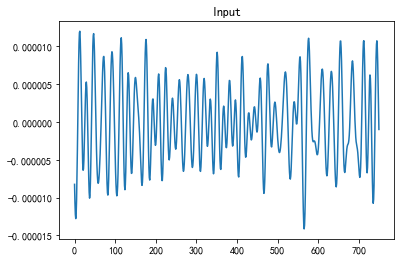

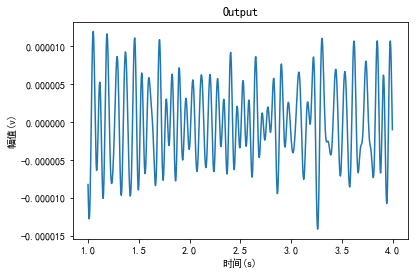

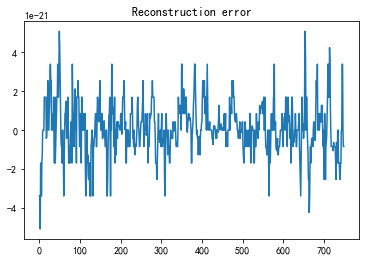

In [61]:
# figure()
# plot(np.abs(vecs_x.highpasses[0]))
# title('Level 2 wavelet coefficient magnitudes')
# Show input
vecs=test2[0:750,0]
figure()
plot(vecs)
title('Input')

# Show output
figure()
plot(np.arange(1,4,0.004),vecs_recon)
plt.xlabel("时间(s)")
plt.ylabel("幅值(v)")
title('Output')

# Show error
figure()
plot(vecs_recon - vecs)
title('Reconstruction error')

print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs - vecs_recon))))

Text(0, 0.5, '幅值(V)')

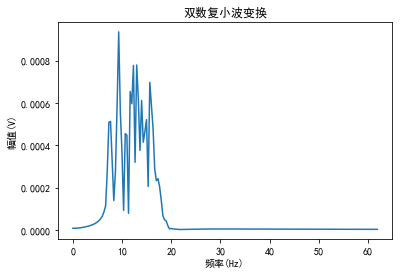

In [47]:
import scipy
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
t3_fft1=fft(vecs_recon)
abs_t3_fft1=np.abs(t3_fft1)
x=np.arange(750)
N=751
#采样频率
fs=250
freq=x*fs/N
half_test3_freq = freq[range(int(N/4))] 
half_test3=abs_t3_fft1[range(int(N/4))] 

plt.figure()
plt.plot(half_test3_freq,half_test3)   
title('双数复小波变换')
plt.xlabel("频率(Hz)")
plt.ylabel("幅值(V)")

## 小波包分解

In [4]:
import pywt

# signal is decomposed to level 5 with 'sym4' wavelet

def wpd(X):
    coeffs = pywt.WaveletPacket(X,'sym4',mode='symmetric',maxlevel=5)
#     coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz/7-35Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)

In [11]:
wpd_data[0][0][0]

array([ 6.35528590e-06, -3.95459544e-06,  8.36726093e-06, -1.90007695e-05,
       -6.18467711e-06,  9.58186873e-07, -1.18924584e-05, -1.20855281e-05,
       -1.05291191e-05,  2.14511137e-06,  4.20175504e-06, -1.73626068e-06,
        1.37767194e-06,  5.74561513e-06,  6.91742818e-07,  1.88757100e-08,
        1.84890751e-06,  1.06396228e-05,  1.68495128e-05,  2.85319710e-05,
        3.47221316e-05,  2.69859908e-05,  3.29466298e-06, -8.13518984e-06,
        7.00844416e-07,  4.05401268e-06, -5.71801863e-06, -9.48524956e-07,
        8.70306578e-07,  1.41910220e-06])

In [6]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder(categories="auto")
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = []
ka = []
prec = []
recall = []

# Model Build

In [7]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(p = 0.5))
    for itr in range(1):
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(p = 0.5))    
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

# 10-Fold Cross Validation

In [8]:
for train_idx, test_idx in cv.split(labels):
    
    Csp = [];ss = [];nn = [] # empty lists
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    #CSP filter applied separately for all Frequency band coefficients
    
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    nn = build_classifier()  
    
    nn.fit(X_train, y_train, batch_size = 32, epochs = 300)
    
    y_pred = nn.predict(X_test)
    pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

    acc.append(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    ka.append(cohen_kappa_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
    prec.append(precision_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))
    recall.append(recall_score(y_test.argmax(axis=1), pred.argmax(axis=1),average='weighted'))


Computing data rank from raw with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 22 dim * 2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 9.7e-06 (2.2e-16 eps * 22 dim * 2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 22 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 22 dim * 2.1e+09  max singular

Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 22 dim * 2.4e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 22 dim * 2e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 9.8e-07 (2.2e-16 eps * 22 dim * 2e+08  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 9s 39ms/step - loss: 1.4821 - acc: 0.4087
Epoch 2/300
230/230 [==============================] - 0s 135us/step - loss: 1.2491 - acc: 0.5565
Epoch 3/300
230/230 [==============================] - 0s 148us/step - loss: 1.0435 - acc: 0.5478
Epoch 4/300
230/230 [==============================] - 0s 126us/step - loss: 0.9610 - acc: 0.5304
Epoch 5/300
230/230 [==============================] - 0s 122us/step - loss: 0.9192 - acc: 0.6043
Epoch 6/300
230/230 [==============================] - 0s 124us/step - loss: 0.8818 - acc: 0.6304
Epoch 7/300
230/230 [==============================] - 0s 116us/step - loss: 0.8635 - acc: 0.6565
Epoch 8/300
230/230 [==============================] - 0s 116us/step - loss: 0.8289 - acc: 0.6652
Epoch 9/300
230/230 [==============================] - 0s 120us/step - loss: 0.8128 - acc: 0.6957
Epoch 10/300
230/230 [==============================] - 0s 124us/step - loss: 0.7741 - acc: 0.7043
Epoch 11/300
230/230

230/230 [==============================] - 0s 107us/step - loss: 0.2971 - acc: 0.9348
Epoch 84/300
230/230 [==============================] - 0s 131us/step - loss: 0.2643 - acc: 0.9522
Epoch 85/300
230/230 [==============================] - 0s 124us/step - loss: 0.2655 - acc: 0.9522
Epoch 86/300
230/230 [==============================] - 0s 131us/step - loss: 0.2825 - acc: 0.9435
Epoch 87/300
230/230 [==============================] - 0s 120us/step - loss: 0.2808 - acc: 0.9391
Epoch 88/300
230/230 [==============================] - 0s 109us/step - loss: 0.2849 - acc: 0.9435
Epoch 89/300
230/230 [==============================] - 0s 126us/step - loss: 0.2629 - acc: 0.9652
Epoch 90/300
230/230 [==============================] - 0s 122us/step - loss: 0.2519 - acc: 0.9652
Epoch 91/300
230/230 [==============================] - 0s 113us/step - loss: 0.2874 - acc: 0.9348
Epoch 92/300
230/230 [==============================] - 0s 120us/step - loss: 0.2901 - acc: 0.9435
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 111us/step - loss: 0.2094 - acc: 0.9652
Epoch 165/300
230/230 [==============================] - 0s 124us/step - loss: 0.2131 - acc: 0.9696
Epoch 166/300
230/230 [==============================] - 0s 140us/step - loss: 0.2045 - acc: 0.9783
Epoch 167/300
230/230 [==============================] - 0s 166us/step - loss: 0.1864 - acc: 0.9783
Epoch 168/300
230/230 [==============================] - 0s 120us/step - loss: 0.1962 - acc: 0.9696
Epoch 169/300
230/230 [==============================] - 0s 122us/step - loss: 0.1915 - acc: 0.9783
Epoch 170/300
230/230 [==============================] - 0s 120us/step - loss: 0.1924 - acc: 0.9783
Epoch 171/300
230/230 [==============================] - 0s 120us/step - loss: 0.1833 - acc: 0.9826
Epoch 172/300
230/230 [==============================] - 0s 113us/step - loss: 0.1821 - acc: 0.9826
Epoch 173/300
230/230 [==============================] - 0s 124us/step - loss: 0.2213 - acc: 0.9696
Epoch 174/300


230/230 [==============================] - 0s 116us/step - loss: 0.1527 - acc: 1.0000
Epoch 247/300
230/230 [==============================] - 0s 126us/step - loss: 0.1765 - acc: 0.9696
Epoch 248/300
230/230 [==============================] - 0s 122us/step - loss: 0.1785 - acc: 0.9826
Epoch 249/300
230/230 [==============================] - 0s 116us/step - loss: 0.1649 - acc: 0.9826
Epoch 250/300
230/230 [==============================] - 0s 129us/step - loss: 0.1792 - acc: 0.9739
Epoch 251/300
230/230 [==============================] - 0s 120us/step - loss: 0.1563 - acc: 0.9870
Epoch 252/300
230/230 [==============================] - 0s 126us/step - loss: 0.1615 - acc: 0.9783
Epoch 253/300
230/230 [==============================] - 0s 120us/step - loss: 0.1797 - acc: 0.9696
Epoch 254/300
230/230 [==============================] - 0s 111us/step - loss: 0.1718 - acc: 0.9783
Epoch 255/300
230/230 [==============================] - 0s 118us/step - loss: 0.1752 - acc: 0.9870
Epoch 256/300


    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.6e-06 (2.2e-16 eps * 22 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 22

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 1ms/step - loss: 1.4615 - acc: 0.5565
Epoch 2/300
230/230 [==============================] - 0s 131us/step - loss: 1.2213 - acc: 0.5870
Epoch 3/300
230/230 [==============================] - 0s 124us/step - loss: 1.0289 - acc: 0.5478
Epoch 4/300
230/230 [==============================] - 0s 126us/step - loss: 0.9439 - acc: 0.5783
Epoch 5/300
230/230 [==============================] - 0s 131us/step - loss: 0.8937 - acc: 0.6130
Epoch 6/300
230/230 [==============================] - 0s 126us/step - loss: 0.8590 - acc: 0.6478
Epoch 7/300
230/230 [==============================] - 0s 131us/step - loss: 0.8336 - acc: 0.6609
Epoch 8/300
230/230 [==============================] - 0s 129us/step - loss: 0.7976 - acc: 0.7000
Epoch 9/300
230/230 [==============================] - 0s 131us/step - loss: 0.7499 - acc: 0.7087
Epoch 10/300
230/230 [==============================] - 0s 116us/step - loss: 0.7130 - acc: 0.7783
Epoch 11/300
230/230 

230/230 [==============================] - 0s 124us/step - loss: 0.2786 - acc: 0.9522
Epoch 84/300
230/230 [==============================] - 0s 113us/step - loss: 0.3064 - acc: 0.9348
Epoch 85/300
230/230 [==============================] - 0s 131us/step - loss: 0.2856 - acc: 0.9478
Epoch 86/300
230/230 [==============================] - 0s 113us/step - loss: 0.2964 - acc: 0.9478
Epoch 87/300
230/230 [==============================] - 0s 117us/step - loss: 0.2602 - acc: 0.9522
Epoch 88/300
230/230 [==============================] - 0s 118us/step - loss: 0.2603 - acc: 0.9652
Epoch 89/300
230/230 [==============================] - 0s 120us/step - loss: 0.2776 - acc: 0.9522
Epoch 90/300
230/230 [==============================] - 0s 122us/step - loss: 0.3014 - acc: 0.9391
Epoch 91/300
230/230 [==============================] - 0s 116us/step - loss: 0.2737 - acc: 0.9435
Epoch 92/300
230/230 [==============================] - 0s 120us/step - loss: 0.2881 - acc: 0.9435
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 120us/step - loss: 0.1948 - acc: 0.9696
Epoch 166/300
230/230 [==============================] - 0s 124us/step - loss: 0.2348 - acc: 0.9478
Epoch 167/300
230/230 [==============================] - 0s 129us/step - loss: 0.2253 - acc: 0.9435
Epoch 168/300
230/230 [==============================] - 0s 120us/step - loss: 0.2165 - acc: 0.9609
Epoch 169/300
230/230 [==============================] - 0s 120us/step - loss: 0.2429 - acc: 0.9478
Epoch 170/300
230/230 [==============================] - 0s 120us/step - loss: 0.2367 - acc: 0.9391
Epoch 171/300
230/230 [==============================] - 0s 126us/step - loss: 0.2452 - acc: 0.9478
Epoch 172/300
230/230 [==============================] - 0s 124us/step - loss: 0.2275 - acc: 0.9522
Epoch 173/300
230/230 [==============================] - 0s 131us/step - loss: 0.2255 - acc: 0.9696
Epoch 174/300
230/230 [==============================] - 0s 139us/step - loss: 0.2249 - acc: 0.9522
Epoch 175/300


230/230 [==============================] - 0s 120us/step - loss: 0.1778 - acc: 0.9870
Epoch 248/300
230/230 [==============================] - 0s 116us/step - loss: 0.2022 - acc: 0.9522
Epoch 249/300
230/230 [==============================] - 0s 124us/step - loss: 0.1933 - acc: 0.9696
Epoch 250/300
230/230 [==============================] - 0s 116us/step - loss: 0.2101 - acc: 0.9696
Epoch 251/300
230/230 [==============================] - 0s 131us/step - loss: 0.2025 - acc: 0.9696
Epoch 252/300
230/230 [==============================] - 0s 114us/step - loss: 0.1701 - acc: 0.9826
Epoch 253/300
230/230 [==============================] - 0s 124us/step - loss: 0.1792 - acc: 0.9739
Epoch 254/300
230/230 [==============================] - 0s 124us/step - loss: 0.2031 - acc: 0.9565
Epoch 255/300
230/230 [==============================] - 0s 131us/step - loss: 0.1641 - acc: 0.9783
Epoch 256/300
230/230 [==============================] - 0s 124us/step - loss: 0.1728 - acc: 0.9696
Epoch 257/300


    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating c

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 1ms/step - loss: 1.4787 - acc: 0.4870
Epoch 2/300
230/230 [==============================] - 0s 135us/step - loss: 1.2666 - acc: 0.5348
Epoch 3/300
230/230 [==============================] - 0s 133us/step - loss: 1.0629 - acc: 0.5304
Epoch 4/300
230/230 [==============================] - 0s 135us/step - loss: 0.9839 - acc: 0.5478
Epoch 5/300
230/230 [==============================] - 0s 129us/step - loss: 0.9375 - acc: 0.5826
Epoch 6/300
230/230 [==============================] - 0s 129us/step - loss: 0.9071 - acc: 0.5783
Epoch 7/300
230/230 [==============================] - 0s 120us/step - loss: 0.8869 - acc: 0.6522
Epoch 8/300
230/230 [==============================] - 0s 139us/step - loss: 0.8522 - acc: 0.6913
Epoch 9/300
230/230 [==============================] - 0s 131us/step - loss: 0.8000 - acc: 0.6783
Epoch 10/300
230/230 [==============================] - 0s 133us/step - loss: 0.7789 - acc: 0.7391
Epoch 11/300
230/230 

230/230 [==============================] - 0s 124us/step - loss: 0.3628 - acc: 0.9217
Epoch 84/300
230/230 [==============================] - 0s 120us/step - loss: 0.3409 - acc: 0.9304
Epoch 85/300
230/230 [==============================] - 0s 135us/step - loss: 0.3508 - acc: 0.9087
Epoch 86/300
230/230 [==============================] - 0s 122us/step - loss: 0.3206 - acc: 0.9261
Epoch 87/300
230/230 [==============================] - 0s 124us/step - loss: 0.3575 - acc: 0.9130
Epoch 88/300
230/230 [==============================] - 0s 125us/step - loss: 0.3304 - acc: 0.9348
Epoch 89/300
230/230 [==============================] - 0s 118us/step - loss: 0.3483 - acc: 0.9435
Epoch 90/300
230/230 [==============================] - 0s 127us/step - loss: 0.3371 - acc: 0.9261
Epoch 91/300
230/230 [==============================] - 0s 109us/step - loss: 0.2988 - acc: 0.9435
Epoch 92/300
230/230 [==============================] - 0s 120us/step - loss: 0.3524 - acc: 0.9217
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 133us/step - loss: 0.2562 - acc: 0.9522
Epoch 166/300
230/230 [==============================] - 0s 137us/step - loss: 0.2471 - acc: 0.9478
Epoch 167/300
230/230 [==============================] - 0s 120us/step - loss: 0.2390 - acc: 0.9652
Epoch 168/300
230/230 [==============================] - 0s 116us/step - loss: 0.2518 - acc: 0.9522
Epoch 169/300
230/230 [==============================] - 0s 120us/step - loss: 0.2388 - acc: 0.9522
Epoch 170/300
230/230 [==============================] - 0s 118us/step - loss: 0.2389 - acc: 0.9783
Epoch 171/300
230/230 [==============================] - 0s 118us/step - loss: 0.2558 - acc: 0.9609
Epoch 172/300
230/230 [==============================] - 0s 118us/step - loss: 0.2468 - acc: 0.9696
Epoch 173/300
230/230 [==============================] - 0s 120us/step - loss: 0.2331 - acc: 0.9652
Epoch 174/300
230/230 [==============================] - 0s 135us/step - loss: 0.2688 - acc: 0.9348
Epoch 175/300


230/230 [==============================] - 0s 118us/step - loss: 0.1933 - acc: 0.9739
Epoch 247/300
230/230 [==============================] - 0s 126us/step - loss: 0.2082 - acc: 0.9739
Epoch 248/300
230/230 [==============================] - 0s 129us/step - loss: 0.2100 - acc: 0.9652
Epoch 249/300
230/230 [==============================] - 0s 122us/step - loss: 0.2022 - acc: 0.9652
Epoch 250/300
230/230 [==============================] - 0s 118us/step - loss: 0.1943 - acc: 0.9739
Epoch 251/300
230/230 [==============================] - 0s 128us/step - loss: 0.1999 - acc: 0.9609
Epoch 252/300
230/230 [==============================] - 0s 126us/step - loss: 0.1974 - acc: 0.9783
Epoch 253/300
230/230 [==============================] - 0s 126us/step - loss: 0.2136 - acc: 0.9739
Epoch 254/300
230/230 [==============================] - 0s 118us/step - loss: 0.1996 - acc: 0.9696
Epoch 255/300
230/230 [==============================] - 0s 113us/step - loss: 0.2158 - acc: 0.9739
Epoch 256/300


    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.4e-06 (2.2e-16 eps * 22 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 22
 

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 1ms/step - loss: 1.4818 - acc: 0.4739
Epoch 2/300
230/230 [==============================] - 0s 133us/step - loss: 1.2640 - acc: 0.5826
Epoch 3/300
230/230 [==============================] - 0s 122us/step - loss: 1.0368 - acc: 0.5478
Epoch 4/300
230/230 [==============================] - 0s 126us/step - loss: 0.9556 - acc: 0.5609
Epoch 5/300
230/230 [==============================] - 0s 135us/step - loss: 0.9150 - acc: 0.5696
Epoch 6/300
230/230 [==============================] - 0s 127us/step - loss: 0.8813 - acc: 0.6261
Epoch 7/300
230/230 [==============================] - 0s 122us/step - loss: 0.8534 - acc: 0.6783
Epoch 8/300
230/230 [==============================] - 0s 129us/step - loss: 0.8149 - acc: 0.6870
Epoch 9/300
230/230 [==============================] - 0s 120us/step - loss: 0.7698 - acc: 0.7696
Epoch 10/300
230/230 [==============================] - 0s 129us/step - loss: 0.7520 - acc: 0.7609
Epoch 11/300
230/230 

230/230 [==============================] - 0s 126us/step - loss: 0.2976 - acc: 0.9478
Epoch 84/300
230/230 [==============================] - 0s 131us/step - loss: 0.2900 - acc: 0.9435
Epoch 85/300
230/230 [==============================] - 0s 131us/step - loss: 0.2818 - acc: 0.9522
Epoch 86/300
230/230 [==============================] - 0s 118us/step - loss: 0.3001 - acc: 0.9478
Epoch 87/300
230/230 [==============================] - 0s 120us/step - loss: 0.2909 - acc: 0.9522
Epoch 88/300
230/230 [==============================] - 0s 131us/step - loss: 0.2817 - acc: 0.9522
Epoch 89/300
230/230 [==============================] - 0s 124us/step - loss: 0.2720 - acc: 0.9478
Epoch 90/300
230/230 [==============================] - 0s 133us/step - loss: 0.2924 - acc: 0.9348
Epoch 91/300
230/230 [==============================] - 0s 116us/step - loss: 0.2888 - acc: 0.9435
Epoch 92/300
230/230 [==============================] - 0s 113us/step - loss: 0.2787 - acc: 0.9478
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 120us/step - loss: 0.2205 - acc: 0.9739
Epoch 165/300
230/230 [==============================] - 0s 124us/step - loss: 0.2012 - acc: 0.9652
Epoch 166/300
230/230 [==============================] - 0s 126us/step - loss: 0.2180 - acc: 0.9696
Epoch 167/300
230/230 [==============================] - 0s 118us/step - loss: 0.2553 - acc: 0.9435
Epoch 168/300
230/230 [==============================] - 0s 120us/step - loss: 0.2099 - acc: 0.9696
Epoch 169/300
230/230 [==============================] - 0s 117us/step - loss: 0.2087 - acc: 0.9783
Epoch 170/300
230/230 [==============================] - 0s 126us/step - loss: 0.2062 - acc: 0.9739
Epoch 171/300
230/230 [==============================] - 0s 113us/step - loss: 0.1895 - acc: 0.9783
Epoch 172/300
230/230 [==============================] - 0s 131us/step - loss: 0.2134 - acc: 0.9652
Epoch 173/300
230/230 [==============================] - 0s 124us/step - loss: 0.1979 - acc: 0.9739
Epoch 174/300


230/230 [==============================] - 0s 118us/step - loss: 0.1752 - acc: 0.9913
Epoch 247/300
230/230 [==============================] - 0s 131us/step - loss: 0.1869 - acc: 0.9696
Epoch 248/300
230/230 [==============================] - 0s 144us/step - loss: 0.1719 - acc: 0.9870
Epoch 249/300
230/230 [==============================] - 0s 126us/step - loss: 0.1732 - acc: 0.9739
Epoch 250/300
230/230 [==============================] - 0s 131us/step - loss: 0.1607 - acc: 0.9826
Epoch 251/300
230/230 [==============================] - 0s 111us/step - loss: 0.1654 - acc: 0.9870
Epoch 252/300
230/230 [==============================] - 0s 122us/step - loss: 0.1758 - acc: 0.9783
Epoch 253/300
230/230 [==============================] - 0s 116us/step - loss: 0.1993 - acc: 0.9522
Epoch 254/300
230/230 [==============================] - 0s 118us/step - loss: 0.1696 - acc: 0.9783
Epoch 255/300
230/230 [==============================] - 0s 118us/step - loss: 0.1791 - acc: 0.9739
Epoch 256/300


    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
   

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 2ms/step - loss: 1.4674 - acc: 0.5130
Epoch 2/300
230/230 [==============================] - 0s 137us/step - loss: 1.2307 - acc: 0.5696
Epoch 3/300
230/230 [==============================] - 0s 126us/step - loss: 1.0380 - acc: 0.5609
Epoch 4/300
230/230 [==============================] - 0s 133us/step - loss: 0.9568 - acc: 0.5826
Epoch 5/300
230/230 [==============================] - 0s 129us/step - loss: 0.9105 - acc: 0.6043
Epoch 6/300
230/230 [==============================] - 0s 124us/step - loss: 0.8792 - acc: 0.6348
Epoch 7/300
230/230 [==============================] - 0s 135us/step - loss: 0.8405 - acc: 0.7000
Epoch 8/300
230/230 [==============================] - 0s 131us/step - loss: 0.7975 - acc: 0.7174
Epoch 9/300
230/230 [==============================] - 0s 129us/step - loss: 0.7776 - acc: 0.7391
Epoch 10/300
230/230 [==============================] - 0s 126us/step - loss: 0.7446 - acc: 0.7522
Epoch 11/300
230/230 

230/230 [==============================] - 0s 125us/step - loss: 0.2884 - acc: 0.9522
Epoch 84/300
230/230 [==============================] - 0s 109us/step - loss: 0.2950 - acc: 0.9435
Epoch 85/300
230/230 [==============================] - 0s 137us/step - loss: 0.3192 - acc: 0.9261
Epoch 86/300
230/230 [==============================] - 0s 113us/step - loss: 0.3054 - acc: 0.9522
Epoch 87/300
230/230 [==============================] - 0s 121us/step - loss: 0.2905 - acc: 0.9565
Epoch 88/300
230/230 [==============================] - 0s 120us/step - loss: 0.2930 - acc: 0.9522
Epoch 89/300
230/230 [==============================] - 0s 124us/step - loss: 0.2910 - acc: 0.9609
Epoch 90/300
230/230 [==============================] - 0s 142us/step - loss: 0.2912 - acc: 0.9435
Epoch 91/300
230/230 [==============================] - 0s 131us/step - loss: 0.2935 - acc: 0.9522
Epoch 92/300
230/230 [==============================] - 0s 120us/step - loss: 0.2860 - acc: 0.9609
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 126us/step - loss: 0.1979 - acc: 0.9783
Epoch 166/300
230/230 [==============================] - 0s 107us/step - loss: 0.2155 - acc: 0.9652
Epoch 167/300
230/230 [==============================] - 0s 141us/step - loss: 0.2167 - acc: 0.9565
Epoch 168/300
230/230 [==============================] - 0s 129us/step - loss: 0.2000 - acc: 0.9826
Epoch 169/300
230/230 [==============================] - 0s 126us/step - loss: 0.2188 - acc: 0.9739
Epoch 170/300
230/230 [==============================] - 0s 120us/step - loss: 0.2087 - acc: 0.9609
Epoch 171/300
230/230 [==============================] - 0s 116us/step - loss: 0.1926 - acc: 0.9870
Epoch 172/300
230/230 [==============================] - 0s 131us/step - loss: 0.2260 - acc: 0.9696
Epoch 173/300
230/230 [==============================] - 0s 135us/step - loss: 0.2204 - acc: 0.9652
Epoch 174/300
230/230 [==============================] - 0s 126us/step - loss: 0.2179 - acc: 0.9609
Epoch 175/300


230/230 [==============================] - 0s 129us/step - loss: 0.1995 - acc: 0.9783
Epoch 248/300
230/230 [==============================] - 0s 118us/step - loss: 0.1838 - acc: 0.9783
Epoch 249/300
230/230 [==============================] - 0s 142us/step - loss: 0.1907 - acc: 0.9826
Epoch 250/300
230/230 [==============================] - 0s 122us/step - loss: 0.1815 - acc: 0.9783
Epoch 251/300
230/230 [==============================] - 0s 131us/step - loss: 0.1723 - acc: 0.9826
Epoch 252/300
230/230 [==============================] - 0s 122us/step - loss: 0.2149 - acc: 0.9565
Epoch 253/300
230/230 [==============================] - 0s 129us/step - loss: 0.1878 - acc: 0.9783
Epoch 254/300
230/230 [==============================] - 0s 125us/step - loss: 0.1818 - acc: 0.9826
Epoch 255/300
230/230 [==============================] - 0s 129us/step - loss: 0.1643 - acc: 1.0000
Epoch 256/300
230/230 [==============================] - 0s 120us/step - loss: 0.1621 - acc: 0.9783
Epoch 257/300


    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.7e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating c

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 2ms/step - loss: 1.4753 - acc: 0.4826
Epoch 2/300
230/230 [==============================] - 0s 128us/step - loss: 1.2497 - acc: 0.5783
Epoch 3/300
230/230 [==============================] - 0s 139us/step - loss: 1.0628 - acc: 0.5435
Epoch 4/300
230/230 [==============================] - 0s 133us/step - loss: 0.9526 - acc: 0.5739
Epoch 5/300
230/230 [==============================] - 0s 127us/step - loss: 0.9226 - acc: 0.6217
Epoch 6/300
230/230 [==============================] - 0s 125us/step - loss: 0.8791 - acc: 0.6304
Epoch 7/300
230/230 [==============================] - 0s 129us/step - loss: 0.8495 - acc: 0.6609
Epoch 8/300
230/230 [==============================] - 0s 126us/step - loss: 0.8149 - acc: 0.6957
Epoch 9/300
230/230 [==============================] - 0s 135us/step - loss: 0.7774 - acc: 0.7217
Epoch 10/300
230/230 [==============================] - 0s 133us/step - loss: 0.7368 - acc: 0.8000
Epoch 11/300
230/230 

230/230 [==============================] - 0s 124us/step - loss: 0.2630 - acc: 0.9435
Epoch 84/300
230/230 [==============================] - 0s 120us/step - loss: 0.2873 - acc: 0.9522
Epoch 85/300
230/230 [==============================] - 0s 118us/step - loss: 0.2864 - acc: 0.9565
Epoch 86/300
230/230 [==============================] - 0s 129us/step - loss: 0.2790 - acc: 0.9522
Epoch 87/300
230/230 [==============================] - 0s 120us/step - loss: 0.2977 - acc: 0.9391
Epoch 88/300
230/230 [==============================] - 0s 135us/step - loss: 0.2871 - acc: 0.9391
Epoch 89/300
230/230 [==============================] - 0s 137us/step - loss: 0.2502 - acc: 0.9696
Epoch 90/300
230/230 [==============================] - 0s 113us/step - loss: 0.2565 - acc: 0.9522
Epoch 91/300
230/230 [==============================] - 0s 122us/step - loss: 0.2643 - acc: 0.9522
Epoch 92/300
230/230 [==============================] - 0s 120us/step - loss: 0.2490 - acc: 0.9696
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 109us/step - loss: 0.1967 - acc: 0.9826
Epoch 166/300
230/230 [==============================] - 0s 124us/step - loss: 0.2010 - acc: 0.9652
Epoch 167/300
230/230 [==============================] - 0s 126us/step - loss: 0.1987 - acc: 0.9696
Epoch 168/300
230/230 [==============================] - 0s 118us/step - loss: 0.1984 - acc: 0.9826
Epoch 169/300
230/230 [==============================] - 0s 131us/step - loss: 0.1981 - acc: 0.9739
Epoch 170/300
230/230 [==============================] - 0s 124us/step - loss: 0.1774 - acc: 0.9870
Epoch 171/300
230/230 [==============================] - 0s 121us/step - loss: 0.2022 - acc: 0.9609
Epoch 172/300
230/230 [==============================] - 0s 129us/step - loss: 0.1880 - acc: 0.9826
Epoch 173/300
230/230 [==============================] - 0s 124us/step - loss: 0.1979 - acc: 0.9696
Epoch 174/300
230/230 [==============================] - 0s 126us/step - loss: 0.1791 - acc: 0.9783
Epoch 175/300


230/230 [==============================] - 0s 133us/step - loss: 0.1584 - acc: 0.9957
Epoch 247/300
230/230 [==============================] - 0s 126us/step - loss: 0.1856 - acc: 0.9739
Epoch 248/300
230/230 [==============================] - 0s 118us/step - loss: 0.1621 - acc: 0.9870
Epoch 249/300
230/230 [==============================] - 0s 122us/step - loss: 0.1533 - acc: 0.9826
Epoch 250/300
230/230 [==============================] - 0s 128us/step - loss: 0.1676 - acc: 0.9783
Epoch 251/300
230/230 [==============================] - 0s 131us/step - loss: 0.1536 - acc: 0.9783
Epoch 252/300
230/230 [==============================] - 0s 126us/step - loss: 0.1807 - acc: 0.9696
Epoch 253/300
230/230 [==============================] - 0s 124us/step - loss: 0.1466 - acc: 0.9913
Epoch 254/300
230/230 [==============================] - 0s 116us/step - loss: 0.1547 - acc: 0.9870
Epoch 255/300
230/230 [==============================] - 0s 120us/step - loss: 0.1642 - acc: 0.9739
Epoch 256/300


    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.5e-06 (2.2e-16 eps * 22 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 22
   

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 2ms/step - loss: 1.4814 - acc: 0.4304
Epoch 2/300
230/230 [==============================] - 0s 124us/step - loss: 1.2757 - acc: 0.5304
Epoch 3/300
230/230 [==============================] - 0s 133us/step - loss: 1.0548 - acc: 0.5391
Epoch 4/300
230/230 [==============================] - 0s 122us/step - loss: 0.9550 - acc: 0.6087
Epoch 5/300
230/230 [==============================] - 0s 113us/step - loss: 0.9265 - acc: 0.5739
Epoch 6/300
230/230 [==============================] - 0s 118us/step - loss: 0.8824 - acc: 0.6087
Epoch 7/300
230/230 [==============================] - 0s 120us/step - loss: 0.8623 - acc: 0.6435
Epoch 8/300
230/230 [==============================] - 0s 124us/step - loss: 0.7959 - acc: 0.7174
Epoch 9/300
230/230 [==============================] - 0s 126us/step - loss: 0.7936 - acc: 0.7130
Epoch 10/300
230/230 [==============================] - 0s 122us/step - loss: 0.7389 - acc: 0.7435
Epoch 11/300
230/230 

230/230 [==============================] - 0s 205us/step - loss: 0.2902 - acc: 0.9391
Epoch 84/300
230/230 [==============================] - 0s 202us/step - loss: 0.2755 - acc: 0.9696
Epoch 85/300
230/230 [==============================] - 0s 194us/step - loss: 0.3142 - acc: 0.9391
Epoch 86/300
230/230 [==============================] - 0s 126us/step - loss: 0.2649 - acc: 0.9652
Epoch 87/300
230/230 [==============================] - 0s 121us/step - loss: 0.2943 - acc: 0.9522
Epoch 88/300
230/230 [==============================] - 0s 119us/step - loss: 0.3118 - acc: 0.9261
Epoch 89/300
230/230 [==============================] - 0s 116us/step - loss: 0.2637 - acc: 0.9739
Epoch 90/300
230/230 [==============================] - 0s 124us/step - loss: 0.2976 - acc: 0.9478
Epoch 91/300
230/230 [==============================] - 0s 126us/step - loss: 0.2690 - acc: 0.9522
Epoch 92/300
230/230 [==============================] - 0s 113us/step - loss: 0.3001 - acc: 0.9261
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 106us/step - loss: 0.1896 - acc: 0.9870
Epoch 166/300
230/230 [==============================] - 0s 124us/step - loss: 0.1918 - acc: 0.9870
Epoch 167/300
230/230 [==============================] - 0s 122us/step - loss: 0.1930 - acc: 0.9870
Epoch 168/300
230/230 [==============================] - 0s 120us/step - loss: 0.1857 - acc: 0.9739
Epoch 169/300
230/230 [==============================] - 0s 124us/step - loss: 0.2044 - acc: 0.9826
Epoch 170/300
230/230 [==============================] - 0s 116us/step - loss: 0.1953 - acc: 0.9739
Epoch 171/300
230/230 [==============================] - 0s 116us/step - loss: 0.2002 - acc: 0.9783
Epoch 172/300
230/230 [==============================] - 0s 113us/step - loss: 0.1966 - acc: 0.9783
Epoch 173/300
230/230 [==============================] - 0s 120us/step - loss: 0.2214 - acc: 0.9696
Epoch 174/300
230/230 [==============================] - 0s 124us/step - loss: 0.2090 - acc: 0.9696
Epoch 175/300


230/230 [==============================] - 0s 225us/step - loss: 0.1566 - acc: 0.9913
Epoch 247/300
230/230 [==============================] - 0s 207us/step - loss: 0.1519 - acc: 0.9913
Epoch 248/300
230/230 [==============================] - 0s 205us/step - loss: 0.1599 - acc: 0.9826
Epoch 249/300
230/230 [==============================] - 0s 235us/step - loss: 0.1564 - acc: 0.9870
Epoch 250/300
230/230 [==============================] - 0s 203us/step - loss: 0.1642 - acc: 0.9783
Epoch 251/300
230/230 [==============================] - 0s 215us/step - loss: 0.1807 - acc: 0.9696
Epoch 252/300
230/230 [==============================] - 0s 218us/step - loss: 0.1548 - acc: 0.9913
Epoch 253/300
230/230 [==============================] - 0s 170us/step - loss: 0.1616 - acc: 0.9739
Epoch 254/300
230/230 [==============================] - 0s 135us/step - loss: 0.1621 - acc: 0.9957
Epoch 255/300
230/230 [==============================] - 0s 115us/step - loss: 0.1498 - acc: 0.9913
Epoch 256/300


    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.8e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data ra

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 2ms/step - loss: 1.4827 - acc: 0.4348
Epoch 2/300
230/230 [==============================] - 0s 129us/step - loss: 1.2744 - acc: 0.5435
Epoch 3/300
230/230 [==============================] - 0s 129us/step - loss: 1.0755 - acc: 0.5174
Epoch 4/300
230/230 [==============================] - 0s 126us/step - loss: 0.9596 - acc: 0.5913
Epoch 5/300
230/230 [==============================] - 0s 124us/step - loss: 0.9288 - acc: 0.5652
Epoch 6/300
230/230 [==============================] - 0s 129us/step - loss: 0.8717 - acc: 0.6261
Epoch 7/300
230/230 [==============================] - 0s 120us/step - loss: 0.8711 - acc: 0.6522
Epoch 8/300
230/230 [==============================] - 0s 126us/step - loss: 0.8214 - acc: 0.7043
Epoch 9/300
230/230 [==============================] - 0s 124us/step - loss: 0.7904 - acc: 0.7043
Epoch 10/300
230/230 [==============================] - 0s 124us/step - loss: 0.7580 - acc: 0.7261
Epoch 11/300
230/230 

230/230 [==============================] - 0s 106us/step - loss: 0.2927 - acc: 0.9391
Epoch 84/300
230/230 [==============================] - 0s 124us/step - loss: 0.3063 - acc: 0.9435
Epoch 85/300
230/230 [==============================] - 0s 116us/step - loss: 0.2893 - acc: 0.9391
Epoch 86/300
230/230 [==============================] - ETA: 0s - loss: 0.2749 - acc: 0.968 - 0s 124us/step - loss: 0.2998 - acc: 0.9435
Epoch 87/300
230/230 [==============================] - 0s 120us/step - loss: 0.2954 - acc: 0.9478
Epoch 88/300
230/230 [==============================] - 0s 117us/step - loss: 0.2729 - acc: 0.9565
Epoch 89/300
230/230 [==============================] - 0s 116us/step - loss: 0.2880 - acc: 0.9522
Epoch 90/300
230/230 [==============================] - 0s 121us/step - loss: 0.2951 - acc: 0.9304
Epoch 91/300
230/230 [==============================] - 0s 122us/step - loss: 0.2980 - acc: 0.9478
Epoch 92/300
230/230 [==============================] - 0s 122us/step - loss: 0.2670

230/230 [==============================] - 0s 135us/step - loss: 0.2053 - acc: 0.9739
Epoch 165/300
230/230 [==============================] - 0s 124us/step - loss: 0.2126 - acc: 0.9652
Epoch 166/300
230/230 [==============================] - 0s 129us/step - loss: 0.2427 - acc: 0.9609
Epoch 167/300
230/230 [==============================] - 0s 124us/step - loss: 0.2073 - acc: 0.9696
Epoch 168/300
230/230 [==============================] - 0s 135us/step - loss: 0.2312 - acc: 0.9739
Epoch 169/300
230/230 [==============================] - 0s 122us/step - loss: 0.2274 - acc: 0.9696
Epoch 170/300
230/230 [==============================] - 0s 129us/step - loss: 0.2023 - acc: 0.9739
Epoch 171/300
230/230 [==============================] - 0s 111us/step - loss: 0.2073 - acc: 0.9652
Epoch 172/300
230/230 [==============================] - 0s 126us/step - loss: 0.2373 - acc: 0.9522
Epoch 173/300
230/230 [==============================] - 0s 118us/step - loss: 0.2000 - acc: 0.9696
Epoch 174/300


230/230 [==============================] - 0s 129us/step - loss: 0.2058 - acc: 0.9609
Epoch 247/300
230/230 [==============================] - 0s 109us/step - loss: 0.1788 - acc: 0.9826
Epoch 248/300
230/230 [==============================] - 0s 120us/step - loss: 0.1790 - acc: 0.9739
Epoch 249/300
230/230 [==============================] - 0s 116us/step - loss: 0.1587 - acc: 0.9826
Epoch 250/300
230/230 [==============================] - 0s 125us/step - loss: 0.1793 - acc: 0.9870
Epoch 251/300
230/230 [==============================] - 0s 135us/step - loss: 0.1582 - acc: 0.9826
Epoch 252/300
230/230 [==============================] - 0s 164us/step - loss: 0.1745 - acc: 0.9783
Epoch 253/300
230/230 [==============================] - 0s 168us/step - loss: 0.2189 - acc: 0.9652
Epoch 254/300
230/230 [==============================] - 0s 174us/step - loss: 0.1614 - acc: 0.9870
Epoch 255/300
230/230 [==============================] - 0s 168us/step - loss: 0.1610 - acc: 0.9826
Epoch 256/300


    Using tolerance 1.3e-05 (2.2e-16 eps * 22 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.4e-05 (2.2e-16 eps * 22 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 6e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
   

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 0s 2ms/step - loss: 1.4764 - acc: 0.4391
Epoch 2/300
230/230 [==============================] - 0s 133us/step - loss: 1.2673 - acc: 0.5087
Epoch 3/300
230/230 [==============================] - 0s 124us/step - loss: 1.0691 - acc: 0.5391
Epoch 4/300
230/230 [==============================] - 0s 129us/step - loss: 0.9696 - acc: 0.5739
Epoch 5/300
230/230 [==============================] - 0s 174us/step - loss: 0.9186 - acc: 0.6130
Epoch 6/300
230/230 [==============================] - 0s 190us/step - loss: 0.8894 - acc: 0.6435
Epoch 7/300
230/230 [==============================] - 0s 172us/step - loss: 0.8463 - acc: 0.7130
Epoch 8/300
230/230 [==============================] - 0s 173us/step - loss: 0.7999 - acc: 0.7478
Epoch 9/300
230/230 [==============================] - 0s 177us/step - loss: 0.7422 - acc: 0.7957
Epoch 10/300
230/230 [==============================] - 0s 190us/step - loss: 0.7191 - acc: 0.7565
Epoch 11/300
230/230 

230/230 [==============================] - 0s 116us/step - loss: 0.2465 - acc: 0.9652
Epoch 84/300
230/230 [==============================] - 0s 108us/step - loss: 0.2454 - acc: 0.9652
Epoch 85/300
230/230 [==============================] - 0s 140us/step - loss: 0.2840 - acc: 0.9391
Epoch 86/300
230/230 [==============================] - 0s 174us/step - loss: 0.2558 - acc: 0.9478
Epoch 87/300
230/230 [==============================] - 0s 181us/step - loss: 0.2408 - acc: 0.9696
Epoch 88/300
230/230 [==============================] - 0s 174us/step - loss: 0.2429 - acc: 0.9609
Epoch 89/300
230/230 [==============================] - 0s 185us/step - loss: 0.2385 - acc: 0.9783
Epoch 90/300
230/230 [==============================] - 0s 190us/step - loss: 0.2400 - acc: 0.9565
Epoch 91/300
230/230 [==============================] - 0s 185us/step - loss: 0.2418 - acc: 0.9565
Epoch 92/300
230/230 [==============================] - 0s 161us/step - loss: 0.2547 - acc: 0.9565
Epoch 93/300
230/230 [=

230/230 [==============================] - 0s 113us/step - loss: 0.1724 - acc: 0.9870
Epoch 166/300
230/230 [==============================] - 0s 116us/step - loss: 0.1868 - acc: 0.9739
Epoch 167/300
230/230 [==============================] - 0s 131us/step - loss: 0.1695 - acc: 0.9739
Epoch 168/300
230/230 [==============================] - 0s 124us/step - loss: 0.1866 - acc: 0.9783
Epoch 169/300
230/230 [==============================] - 0s 126us/step - loss: 0.1886 - acc: 0.9783
Epoch 170/300
230/230 [==============================] - 0s 146us/step - loss: 0.1704 - acc: 0.9826
Epoch 171/300
230/230 [==============================] - 0s 165us/step - loss: 0.1754 - acc: 0.9739
Epoch 172/300
230/230 [==============================] - 0s 177us/step - loss: 0.1829 - acc: 0.9783
Epoch 173/300
230/230 [==============================] - 0s 187us/step - loss: 0.1780 - acc: 0.9870
Epoch 174/300
230/230 [==============================] - 0s 185us/step - loss: 0.1670 - acc: 0.9870
Epoch 175/300


230/230 [==============================] - 0s 126us/step - loss: 0.1846 - acc: 0.9783
Epoch 247/300
230/230 [==============================] - 0s 120us/step - loss: 0.1555 - acc: 0.9783
Epoch 248/300
230/230 [==============================] - 0s 122us/step - loss: 0.1398 - acc: 0.9826
Epoch 249/300
230/230 [==============================] - 0s 168us/step - loss: 0.1533 - acc: 0.9826
Epoch 250/300
230/230 [==============================] - 0s 174us/step - loss: 0.1614 - acc: 0.9913
Epoch 251/300
230/230 [==============================] - 0s 244us/step - loss: 0.1321 - acc: 0.9957
Epoch 252/300
230/230 [==============================] - 0s 246us/step - loss: 0.1776 - acc: 0.9609
Epoch 253/300
230/230 [==============================] - 0s 240us/step - loss: 0.1439 - acc: 0.9826
Epoch 254/300
230/230 [==============================] - 0s 233us/step - loss: 0.1489 - acc: 0.9870
Epoch 255/300
230/230 [==============================] - 0s 192us/step - loss: 0.1473 - acc: 0.9826
Epoch 256/300


    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 1.5e-05 (2.2e-16 eps * 22 dim * 3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing data rank from raw with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 22 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data ra

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  if __name__ == '__main__':


Epoch 1/300
230/230 [==============================] - 1s 2ms/step - loss: 1.4778 - acc: 0.5174
Epoch 2/300
230/230 [==============================] - 0s 175us/step - loss: 1.2647 - acc: 0.5696
Epoch 3/300
230/230 [==============================] - 0s 135us/step - loss: 1.0593 - acc: 0.5435
Epoch 4/300
230/230 [==============================] - 0s 172us/step - loss: 0.9686 - acc: 0.5870
Epoch 5/300
230/230 [==============================] - 0s 157us/step - loss: 0.9271 - acc: 0.5565
Epoch 6/300
230/230 [==============================] - 0s 163us/step - loss: 0.8870 - acc: 0.6043
Epoch 7/300
230/230 [==============================] - 0s 157us/step - loss: 0.8427 - acc: 0.6913
Epoch 8/300
230/230 [==============================] - 0s 142us/step - loss: 0.8070 - acc: 0.7000
Epoch 9/300
230/230 [==============================] - 0s 161us/step - loss: 0.7920 - acc: 0.7435
Epoch 10/300
230/230 [==============================] - 0s 183us/step - loss: 0.7705 - acc: 0.6957
Epoch 11/300
230/230 

230/230 [==============================] - 0s 115us/step - loss: 0.3589 - acc: 0.9130
Epoch 83/300
230/230 [==============================] - 0s 107us/step - loss: 0.3505 - acc: 0.9217
Epoch 84/300
230/230 [==============================] - 0s 120us/step - loss: 0.3707 - acc: 0.9087
Epoch 85/300
230/230 [==============================] - 0s 112us/step - loss: 0.3260 - acc: 0.9304
Epoch 86/300
230/230 [==============================] - 0s 116us/step - loss: 0.3362 - acc: 0.9391
Epoch 87/300
230/230 [==============================] - 0s 122us/step - loss: 0.3640 - acc: 0.9000
Epoch 88/300
230/230 [==============================] - 0s 177us/step - loss: 0.3528 - acc: 0.9130
Epoch 89/300
230/230 [==============================] - 0s 214us/step - loss: 0.3275 - acc: 0.9348
Epoch 90/300
230/230 [==============================] - 0s 216us/step - loss: 0.3172 - acc: 0.9174
Epoch 91/300
230/230 [==============================] - 0s 205us/step - loss: 0.3917 - acc: 0.9043
Epoch 92/300
230/230 [=

230/230 [==============================] - 0s 144us/step - loss: 0.2646 - acc: 0.9565
Epoch 165/300
230/230 [==============================] - 0s 153us/step - loss: 0.2921 - acc: 0.9435
Epoch 166/300
230/230 [==============================] - 0s 111us/step - loss: 0.2496 - acc: 0.9652
Epoch 167/300
230/230 [==============================] - 0s 129us/step - loss: 0.2817 - acc: 0.9348
Epoch 168/300
230/230 [==============================] - 0s 122us/step - loss: 0.2946 - acc: 0.9348
Epoch 169/300
230/230 [==============================] - 0s 166us/step - loss: 0.2616 - acc: 0.9522
Epoch 170/300
230/230 [==============================] - 0s 207us/step - loss: 0.2398 - acc: 0.9522
Epoch 171/300
230/230 [==============================] - 0s 201us/step - loss: 0.2727 - acc: 0.9478
Epoch 172/300
230/230 [==============================] - 0s 199us/step - loss: 0.2271 - acc: 0.9696
Epoch 173/300
230/230 [==============================] - 0s 126us/step - loss: 0.2859 - acc: 0.9304
Epoch 174/300


230/230 [==============================] - 0s 177us/step - loss: 0.1898 - acc: 0.9652
Epoch 247/300
230/230 [==============================] - 0s 146us/step - loss: 0.2150 - acc: 0.9522
Epoch 248/300
230/230 [==============================] - 0s 194us/step - loss: 0.2470 - acc: 0.9565
Epoch 249/300
230/230 [==============================] - 0s 140us/step - loss: 0.1974 - acc: 0.9739
Epoch 250/300
230/230 [==============================] - 0s 124us/step - loss: 0.2078 - acc: 0.9652
Epoch 251/300
230/230 [==============================] - 0s 119us/step - loss: 0.2511 - acc: 0.9522
Epoch 252/300
230/230 [==============================] - 0s 109us/step - loss: 0.1858 - acc: 0.9870
Epoch 253/300
230/230 [==============================] - 0s 118us/step - loss: 0.1897 - acc: 0.9826
Epoch 254/300
230/230 [==============================] - 0s 122us/step - loss: 0.1787 - acc: 0.9826
Epoch 255/300
230/230 [==============================] - 0s 115us/step - loss: 0.1825 - acc: 0.9870
Epoch 256/300


## Metrics

In [9]:
import pandas as pd

scores = {'Accuracy':acc,'Kappa':ka,'Precision':prec,'Recall':recall}

Es = pd.DataFrame(scores)

avg = {'Accuracy':[np.mean(acc)],'Kappa':[np.mean(ka)],'Precision':[np.mean(prec)],'Recall':[np.mean(recall)]}

Avg = pd.DataFrame(avg)


T = pd.concat([Es,Avg])

T.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T.index.rename('Fold',inplace=True)

print(T)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.637931  0.518196   0.657123  0.637931
F2    0.672414  0.556182   0.691014  0.672414
F3    0.775862  0.699242   0.778115  0.775862
F4    0.672414  0.560781   0.684014  0.672414
F5    0.655172  0.542947   0.673536  0.655172
F6    0.706897  0.597715   0.728593  0.706897
F7    0.689655  0.583234   0.693078  0.689655
F8    0.741379  0.650322   0.748276  0.741379
F9    0.689655  0.574051   0.693103  0.689655
F10   0.775862  0.703616   0.847210  0.775862
Avg   0.701724  0.598629   0.719406  0.701724


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# importing libraires
%matplotlib inline                 

import pandas as pd                # Implemennts milti-dimensional array and matrices
import numpy as np                 # For data manipulation and analysis


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
from catboost import CatBoostClassifier   # import algorithms for model training 
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    CatBoostClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier","Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit


# SSplit=StratifiedShuffleSplit(test_size=0.3,random_state=7)
acc_dict = {}

# for train_index,test_index in SSplit.split(X,y):
#     X_train,X_test=X.iloc[train_index],X.iloc[test_index]
#     y_train,y_test=y.iloc[train_index],y.iloc[test_index]   
for clf in classifiers:
    name = clf.__class__.__name__
          
    clf.fit(X_train,label_train)
    predict=clf.predict(X_test)
    acc=accuracy_score(label_test,predict)
    if name in acc_dict:
        acc_dict[name]+=acc
    else:
        acc_dict[name]=acc

0:	learn: 1.3649325	total: 355ms	remaining: 5m 54s
1:	learn: 1.3402961	total: 655ms	remaining: 5m 27s
2:	learn: 1.3221291	total: 940ms	remaining: 5m 12s
3:	learn: 1.3041310	total: 1.16s	remaining: 4m 49s
4:	learn: 1.2833869	total: 1.39s	remaining: 4m 36s
5:	learn: 1.2633708	total: 1.62s	remaining: 4m 28s
6:	learn: 1.2412172	total: 1.85s	remaining: 4m 21s
7:	learn: 1.2240548	total: 2.08s	remaining: 4m 17s
8:	learn: 1.2074908	total: 2.3s	remaining: 4m 13s
9:	learn: 1.1909759	total: 2.53s	remaining: 4m 10s
10:	learn: 1.1755817	total: 2.75s	remaining: 4m 7s
11:	learn: 1.1565284	total: 2.98s	remaining: 4m 5s
12:	learn: 1.1425538	total: 3.2s	remaining: 4m 3s
13:	learn: 1.1259601	total: 3.43s	remaining: 4m 1s
14:	learn: 1.1125734	total: 3.65s	remaining: 3m 59s
15:	learn: 1.0930486	total: 3.92s	remaining: 4m 1s
16:	learn: 1.0767120	total: 4.26s	remaining: 4m 6s
17:	learn: 1.0622597	total: 4.5s	remaining: 4m 5s
18:	learn: 1.0492309	total: 4.71s	remaining: 4m 3s
19:	learn: 1.0350746	total: 4.94s

158:	learn: 0.3321112	total: 37.9s	remaining: 3m 20s
159:	learn: 0.3298041	total: 38.1s	remaining: 3m 19s
160:	learn: 0.3279268	total: 38.3s	remaining: 3m 19s
161:	learn: 0.3261091	total: 38.5s	remaining: 3m 19s
162:	learn: 0.3238005	total: 38.8s	remaining: 3m 19s
163:	learn: 0.3219094	total: 39.1s	remaining: 3m 19s
164:	learn: 0.3199651	total: 39.4s	remaining: 3m 19s
165:	learn: 0.3182332	total: 39.6s	remaining: 3m 18s
166:	learn: 0.3166442	total: 39.8s	remaining: 3m 18s
167:	learn: 0.3152983	total: 40.1s	remaining: 3m 18s
168:	learn: 0.3135858	total: 40.3s	remaining: 3m 18s
169:	learn: 0.3115366	total: 40.5s	remaining: 3m 17s
170:	learn: 0.3099463	total: 40.8s	remaining: 3m 17s
171:	learn: 0.3084481	total: 41s	remaining: 3m 17s
172:	learn: 0.3069766	total: 41.2s	remaining: 3m 17s
173:	learn: 0.3052350	total: 41.5s	remaining: 3m 16s
174:	learn: 0.3033480	total: 41.7s	remaining: 3m 16s
175:	learn: 0.3020968	total: 42s	remaining: 3m 16s
176:	learn: 0.3005885	total: 42.2s	remaining: 3m 1

314:	learn: 0.1536117	total: 1m 14s	remaining: 2m 41s
315:	learn: 0.1528431	total: 1m 14s	remaining: 2m 41s
316:	learn: 0.1521100	total: 1m 14s	remaining: 2m 41s
317:	learn: 0.1514073	total: 1m 15s	remaining: 2m 40s
318:	learn: 0.1506962	total: 1m 15s	remaining: 2m 40s
319:	learn: 0.1498561	total: 1m 15s	remaining: 2m 40s
320:	learn: 0.1490265	total: 1m 15s	remaining: 2m 40s
321:	learn: 0.1483476	total: 1m 16s	remaining: 2m 40s
322:	learn: 0.1477195	total: 1m 16s	remaining: 2m 39s
323:	learn: 0.1470538	total: 1m 16s	remaining: 2m 39s
324:	learn: 0.1465894	total: 1m 16s	remaining: 2m 39s
325:	learn: 0.1460372	total: 1m 17s	remaining: 2m 39s
326:	learn: 0.1455385	total: 1m 17s	remaining: 2m 39s
327:	learn: 0.1449613	total: 1m 17s	remaining: 2m 38s
328:	learn: 0.1444863	total: 1m 17s	remaining: 2m 38s
329:	learn: 0.1438836	total: 1m 18s	remaining: 2m 38s
330:	learn: 0.1432982	total: 1m 18s	remaining: 2m 38s
331:	learn: 0.1427438	total: 1m 18s	remaining: 2m 38s
332:	learn: 0.1421396	total:

467:	learn: 0.0879869	total: 1m 49s	remaining: 2m 4s
468:	learn: 0.0877378	total: 1m 50s	remaining: 2m 4s
469:	learn: 0.0874684	total: 1m 50s	remaining: 2m 4s
470:	learn: 0.0872153	total: 1m 50s	remaining: 2m 4s
471:	learn: 0.0869101	total: 1m 50s	remaining: 2m 3s
472:	learn: 0.0866684	total: 1m 50s	remaining: 2m 3s
473:	learn: 0.0863256	total: 1m 51s	remaining: 2m 3s
474:	learn: 0.0859941	total: 1m 51s	remaining: 2m 3s
475:	learn: 0.0855993	total: 1m 51s	remaining: 2m 2s
476:	learn: 0.0852845	total: 1m 51s	remaining: 2m 2s
477:	learn: 0.0850436	total: 1m 52s	remaining: 2m 2s
478:	learn: 0.0848658	total: 1m 52s	remaining: 2m 2s
479:	learn: 0.0847272	total: 1m 52s	remaining: 2m 1s
480:	learn: 0.0845268	total: 1m 52s	remaining: 2m 1s
481:	learn: 0.0843202	total: 1m 52s	remaining: 2m 1s
482:	learn: 0.0841652	total: 1m 53s	remaining: 2m 1s
483:	learn: 0.0839032	total: 1m 53s	remaining: 2m
484:	learn: 0.0836974	total: 1m 53s	remaining: 2m
485:	learn: 0.0834617	total: 1m 53s	remaining: 2m
48

621:	learn: 0.0582526	total: 2m 26s	remaining: 1m 29s
622:	learn: 0.0580980	total: 2m 27s	remaining: 1m 28s
623:	learn: 0.0579468	total: 2m 27s	remaining: 1m 28s
624:	learn: 0.0578627	total: 2m 27s	remaining: 1m 28s
625:	learn: 0.0576993	total: 2m 27s	remaining: 1m 28s
626:	learn: 0.0575842	total: 2m 27s	remaining: 1m 28s
627:	learn: 0.0574819	total: 2m 28s	remaining: 1m 27s
628:	learn: 0.0573878	total: 2m 28s	remaining: 1m 27s
629:	learn: 0.0572361	total: 2m 28s	remaining: 1m 27s
630:	learn: 0.0570331	total: 2m 28s	remaining: 1m 27s
631:	learn: 0.0568784	total: 2m 29s	remaining: 1m 26s
632:	learn: 0.0567236	total: 2m 29s	remaining: 1m 26s
633:	learn: 0.0566829	total: 2m 29s	remaining: 1m 26s
634:	learn: 0.0565480	total: 2m 29s	remaining: 1m 26s
635:	learn: 0.0564732	total: 2m 29s	remaining: 1m 25s
636:	learn: 0.0563371	total: 2m 30s	remaining: 1m 25s
637:	learn: 0.0562300	total: 2m 30s	remaining: 1m 25s
638:	learn: 0.0561077	total: 2m 30s	remaining: 1m 25s
639:	learn: 0.0559595	total:

775:	learn: 0.0424405	total: 3m 1s	remaining: 52.4s
776:	learn: 0.0423663	total: 3m 1s	remaining: 52.2s
777:	learn: 0.0422780	total: 3m 2s	remaining: 52s
778:	learn: 0.0421985	total: 3m 2s	remaining: 51.7s
779:	learn: 0.0421136	total: 3m 2s	remaining: 51.5s
780:	learn: 0.0420604	total: 3m 2s	remaining: 51.3s
781:	learn: 0.0419797	total: 3m 3s	remaining: 51s
782:	learn: 0.0418792	total: 3m 3s	remaining: 50.8s
783:	learn: 0.0418139	total: 3m 3s	remaining: 50.5s
784:	learn: 0.0417317	total: 3m 3s	remaining: 50.3s
785:	learn: 0.0416512	total: 3m 3s	remaining: 50.1s
786:	learn: 0.0415728	total: 3m 4s	remaining: 49.8s
787:	learn: 0.0414846	total: 3m 4s	remaining: 49.6s
788:	learn: 0.0414071	total: 3m 4s	remaining: 49.4s
789:	learn: 0.0413169	total: 3m 4s	remaining: 49.1s
790:	learn: 0.0412492	total: 3m 5s	remaining: 48.9s
791:	learn: 0.0411625	total: 3m 5s	remaining: 48.7s
792:	learn: 0.0410982	total: 3m 5s	remaining: 48.4s
793:	learn: 0.0410348	total: 3m 5s	remaining: 48.2s
794:	learn: 0.04

931:	learn: 0.0327585	total: 3m 39s	remaining: 16s
932:	learn: 0.0327124	total: 3m 40s	remaining: 15.8s
933:	learn: 0.0326492	total: 3m 40s	remaining: 15.6s
934:	learn: 0.0326000	total: 3m 40s	remaining: 15.3s
935:	learn: 0.0325580	total: 3m 40s	remaining: 15.1s
936:	learn: 0.0324985	total: 3m 40s	remaining: 14.9s
937:	learn: 0.0324523	total: 3m 41s	remaining: 14.6s
938:	learn: 0.0324150	total: 3m 41s	remaining: 14.4s
939:	learn: 0.0323661	total: 3m 41s	remaining: 14.2s
940:	learn: 0.0323286	total: 3m 41s	remaining: 13.9s
941:	learn: 0.0322640	total: 3m 42s	remaining: 13.7s
942:	learn: 0.0322168	total: 3m 42s	remaining: 13.4s
943:	learn: 0.0321746	total: 3m 42s	remaining: 13.2s
944:	learn: 0.0321259	total: 3m 42s	remaining: 13s
945:	learn: 0.0320757	total: 3m 43s	remaining: 12.7s
946:	learn: 0.0320321	total: 3m 43s	remaining: 12.5s
947:	learn: 0.0319953	total: 3m 43s	remaining: 12.3s
948:	learn: 0.0319530	total: 3m 43s	remaining: 12s
949:	learn: 0.0318975	total: 3m 44s	remaining: 11.8s

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


E:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


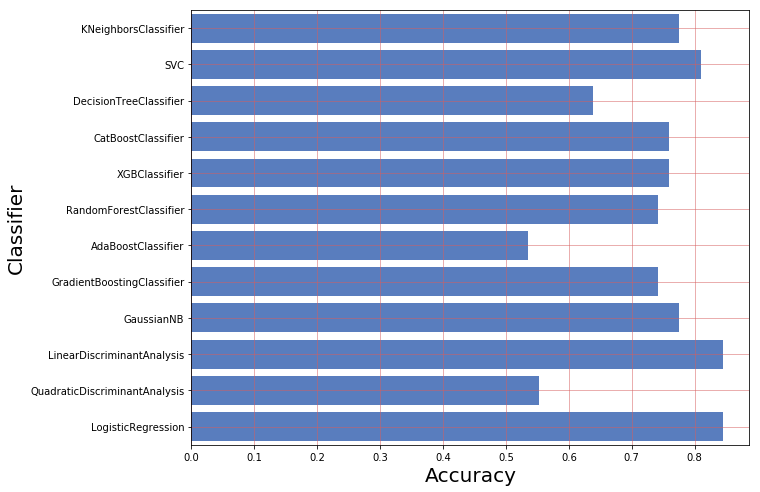

In [13]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
# log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
# plt.title('Classifier Accuracy',fontsize=20)

# 逻辑回归（LR）网格搜索寻参

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train,label_train)
predict1=logreg.predict(X_test)
print(accuracy_score(label_test,predict1))
print(confusion_matrix(label_test,predict))

0.8448275862068966
[[ 9  1  2  0]
 [ 2 16  0  0]
 [ 0  0 10  0]
 [ 1  0  3 14]]


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']
param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True), n_jobs=1,scoring='accuracy')

In [18]:
grid.fit(X_train,label_train)
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

{'C': 0.01, 'penalty': 'l2'}
0.8173913043478261
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

# 支持向量机参数调优

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
 
# iris_data = load_iris()
# X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,random_state=0)
 
# grid search start
best_score = 0
for gamma in [0.001,0.01,1,10,100]:
    for c in [0.001,0.01,1,10,100]:
        # 对于每种参数可能的组合，进行一次训练
        svm = SVC(gamma=gamma,C=c)
        svm.fit(X_train,label_train)
        score = svm.score(X_test,label_test)
        # 找到表现最好的参数
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,"C":c}
 
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))

Best socre:0.79
Best parameters:{'gamma': 0.001, 'C': 10}


# 线性判别分析参数调优

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Lda=LinearDiscriminantAnalysis()
Lda.fit(X_train,label_train)
# LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
#               solver='svd', store_covariance=False, tol=0.0001)
Lda_pre=Lda.predict(X_test)
print(accuracy_score(label_test,Lda_pre))

0.8448275862068966


# 朴素贝叶斯分类器参数调优

In [22]:
from sklearn.naive_bayes import GaussianNB

Gnb=GaussianNB()

Gnb.fit(X_train,label_train)

Gnb_pre=Gnb.predict(X_test)
print(accuracy_score(label_test,Gnb_pre))

0.7758620689655172


# K近邻算法

In [23]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(X_train,label_train)
Knn_pre=Knn.predict(X_test)
print(accuracy_score(label_test,Knn_pre))

0.8275862068965517


In [37]:
from sklearn.ensemble import VotingClassifier

eclf2 = VotingClassifier(estimators=[
    ('logreg',logreg), 
    ('Knn', Knn),
    ('clf',clf), 
    ('Lda', Lda),
    ('Gnb', Gnb)])
eclf2=eclf2.fit(X_train,label_train)
vote_pred = eclf2.predict(X_test)
voting_accy = round(accuracy_score(vote_pred, label_test), 3)
print(voting_accy)

0.862


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Automatically created module for IPython interactive environment


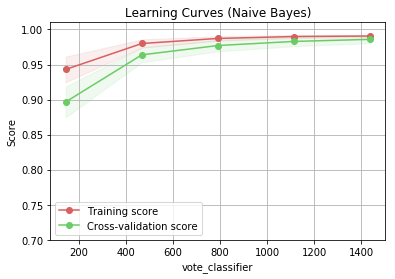

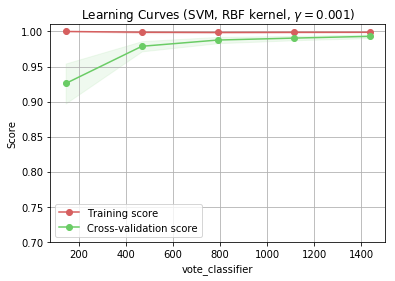

In [56]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("vote_classifier")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)

estimator =Knn
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

